### [Problem 1] Confirmation of competition contents

#### What to learn and what to predict?

##### Learning objective
To develop models that can predict the repayment abilities of clients based on the provided alternative data (including telco and transactional information).

##### Prediction goal
The models should predict whether a client will repay a loan or default. Specifically, the target variable is a binary outcome indicating if a client had difficulties repaying a loan.

##### What kind of file to create and submit to Kaggle?
Submission file format - To create a CSV file for submission. This file should contain two columns: SK_ID_CURR (the unique identifier for each client) and TARGET (the predicted probability of default, where 1 indicates a likelihood of default and 0 indicates non-default).

##### What kind of index value will be used to evaluate the submissions?
Evaluation metric - Submissions will be evaluated based on the Area Under the ROC Curve (AUC). This metric measures the ability of the model to distinguish between clients who will default and those who will not. Higher AUC values indicate better model performance.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [2]:
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')


In [3]:
for col in train_data.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [4]:
for col in test_data.columns:
    print(col)

SK_ID_CURR
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_M

In [5]:
train_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [6]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


###### Target distribution

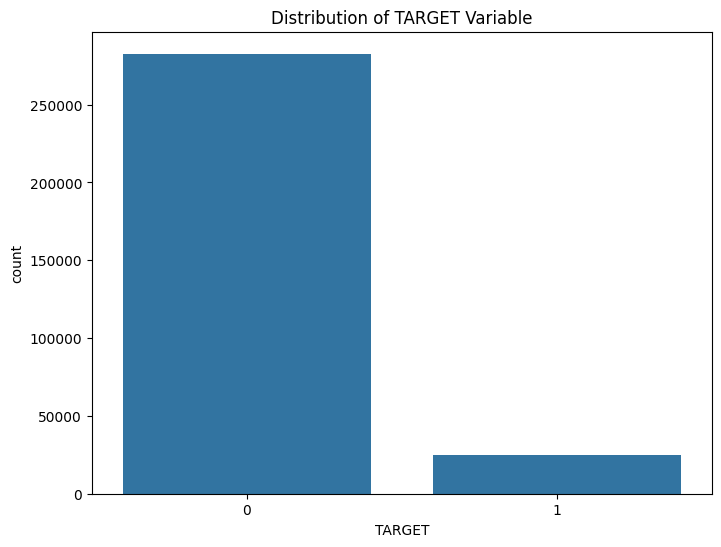

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=train_data)
plt.title('Distribution of TARGET Variable')
plt.show()

Distribution of numerical features



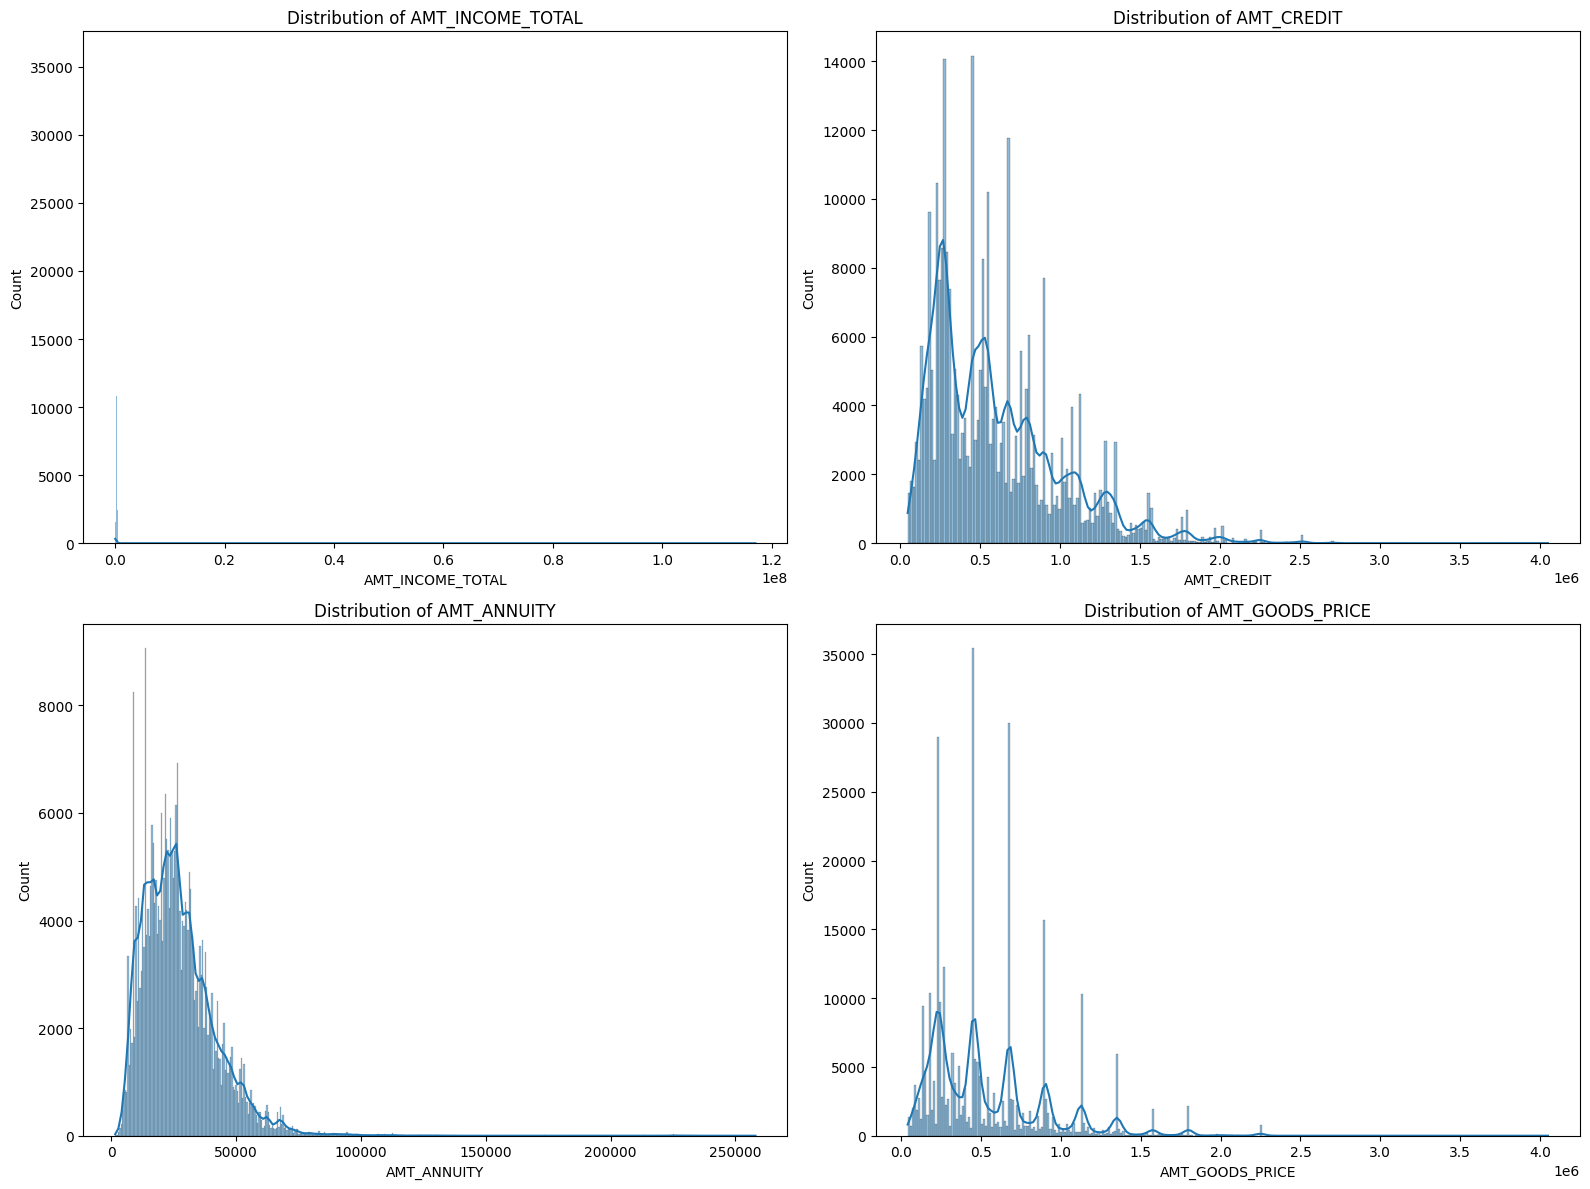

In [9]:
numerical_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_data[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


Correlation analysis

Correlation Heatmap

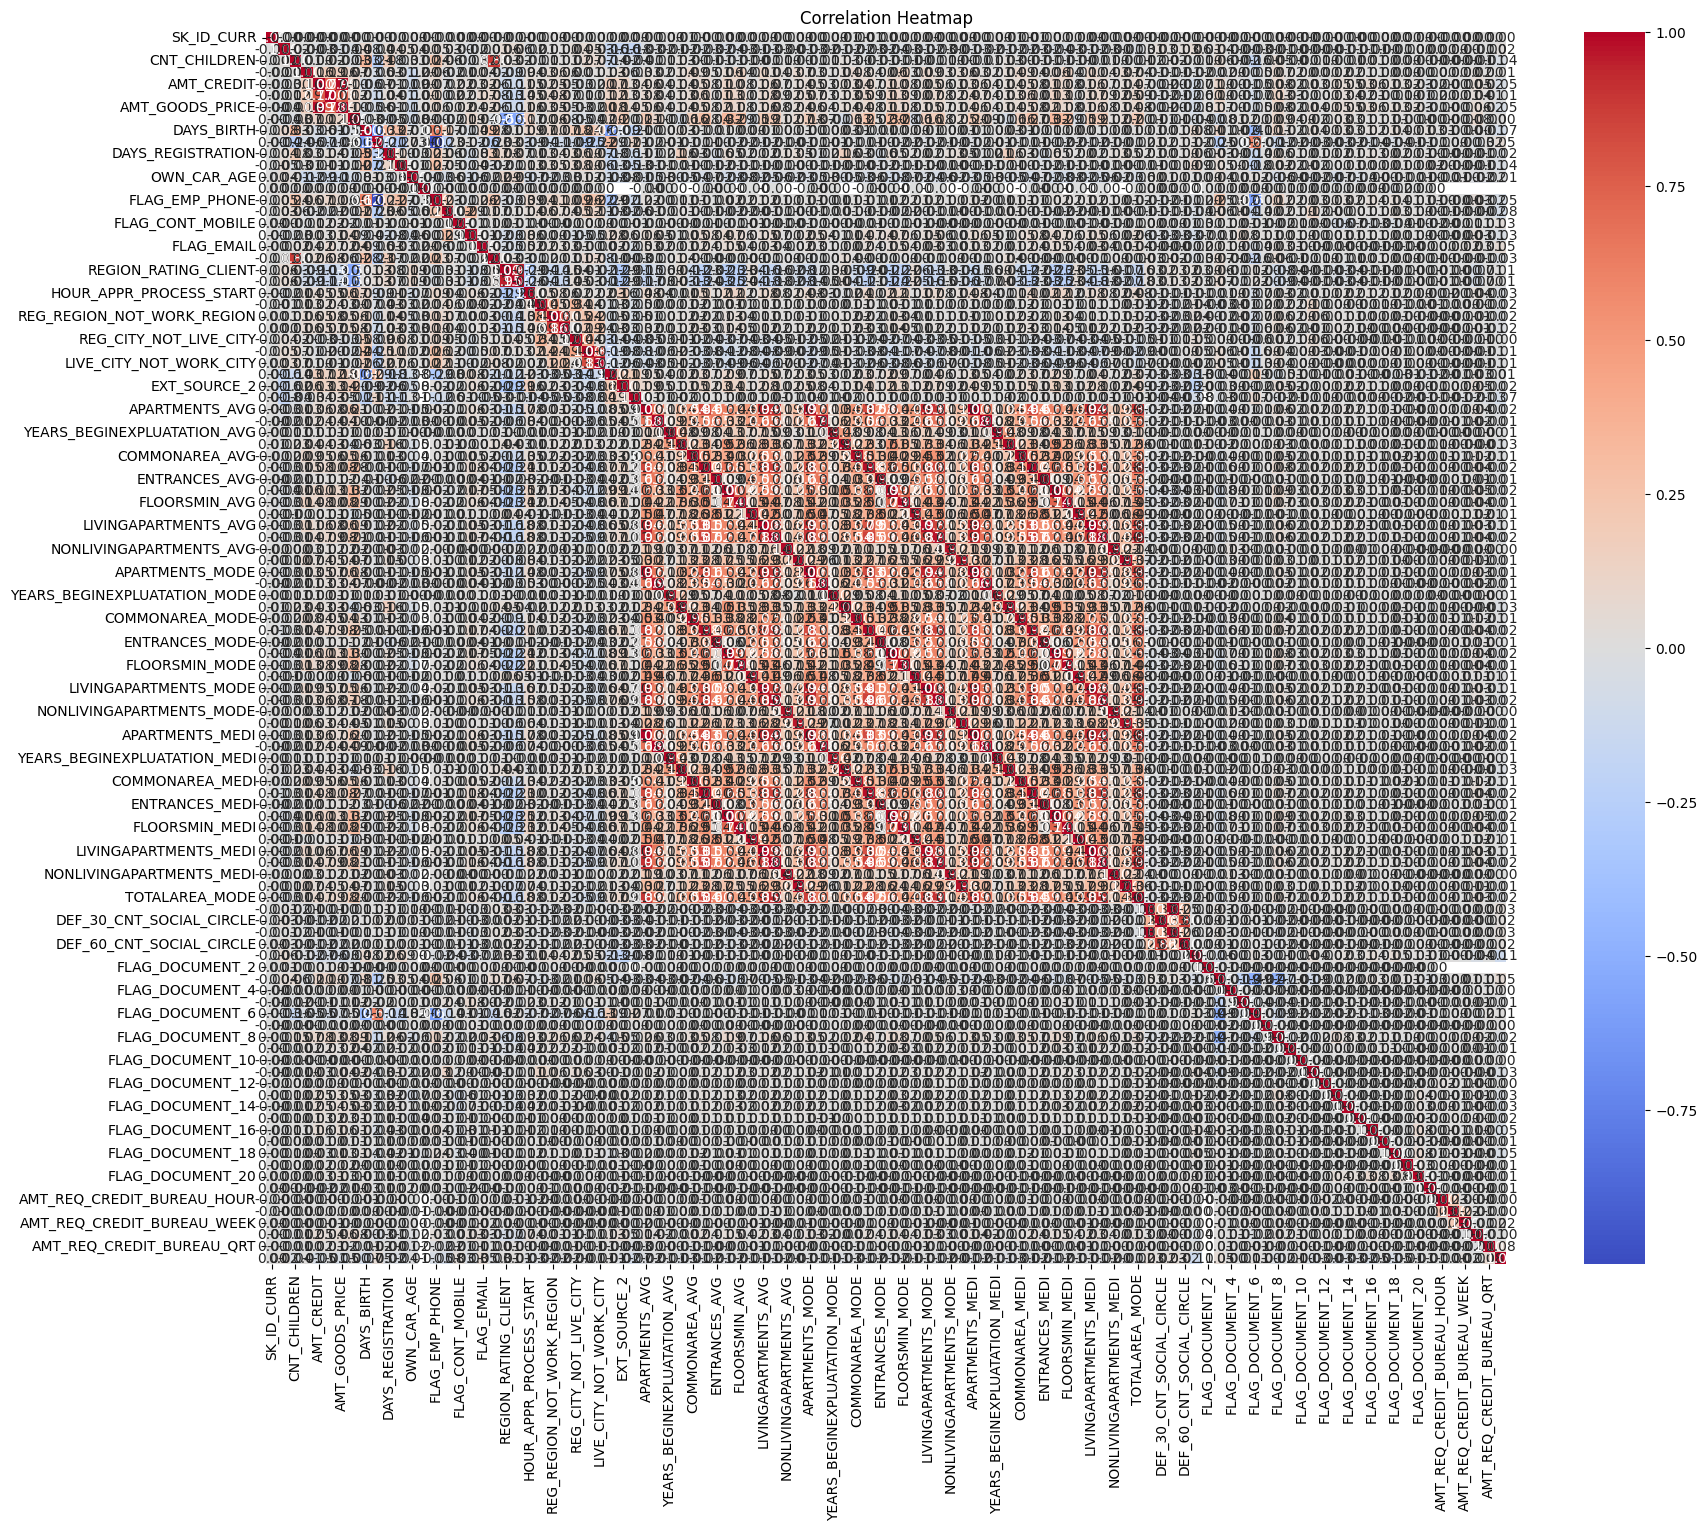

In [10]:
# Exclude non-numeric columns
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
correlation = train_data[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


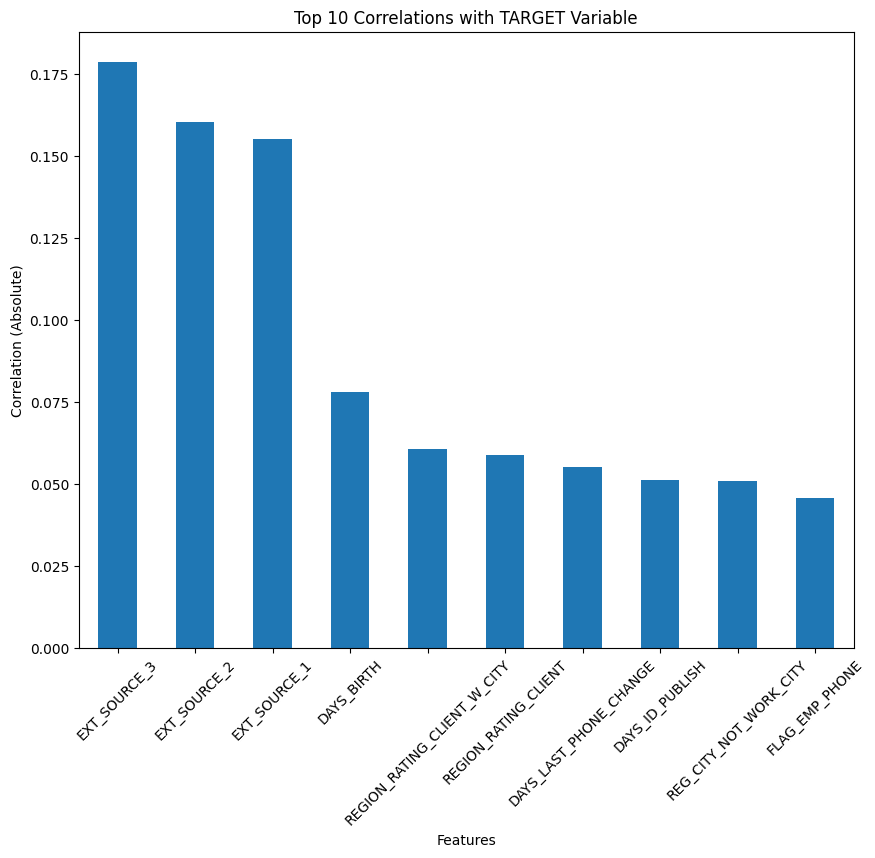

In [11]:
# Calculate correlations with the target variable
correlation_with_target = correlation['TARGET'].abs().sort_values(ascending=False)[1:]

# Select top 10 features
top_10_features = correlation_with_target.head(10).index

# Plot correlations with the target variable
plt.figure(figsize=(10, 8))
correlation_with_target.head(10).plot(kind='bar')
plt.title('Top 10 Correlations with TARGET Variable')
plt.xlabel('Features')
plt.ylabel('Correlation (Absolute)')
plt.xticks(rotation=45)
plt.show()

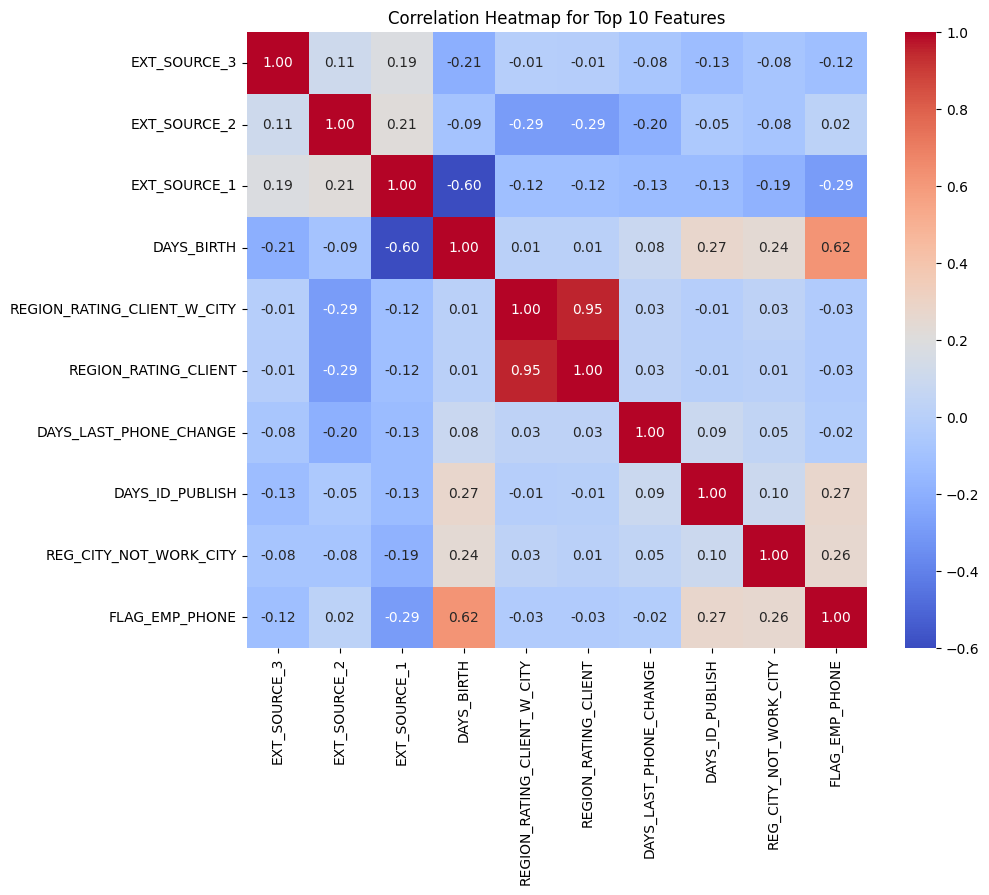

In [12]:
# Select the top 10 features for correlation heatmap
top_10_corr = correlation.loc[top_10_features, top_10_features]

# Plot correlation heatmap for top 10 features
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap for Top 10 Features')
plt.show()

In [13]:
# Print the top 10 features
print("Top 10 Features:")
for feature in top_10_features:
    print(feature)


Top 10 Features:
EXT_SOURCE_3
EXT_SOURCE_2
EXT_SOURCE_1
DAYS_BIRTH
REGION_RATING_CLIENT_W_CITY
REGION_RATING_CLIENT
DAYS_LAST_PHONE_CHANGE
DAYS_ID_PUBLISH
REG_CITY_NOT_WORK_CITY
FLAG_EMP_PHONE


Distribution of numerical features



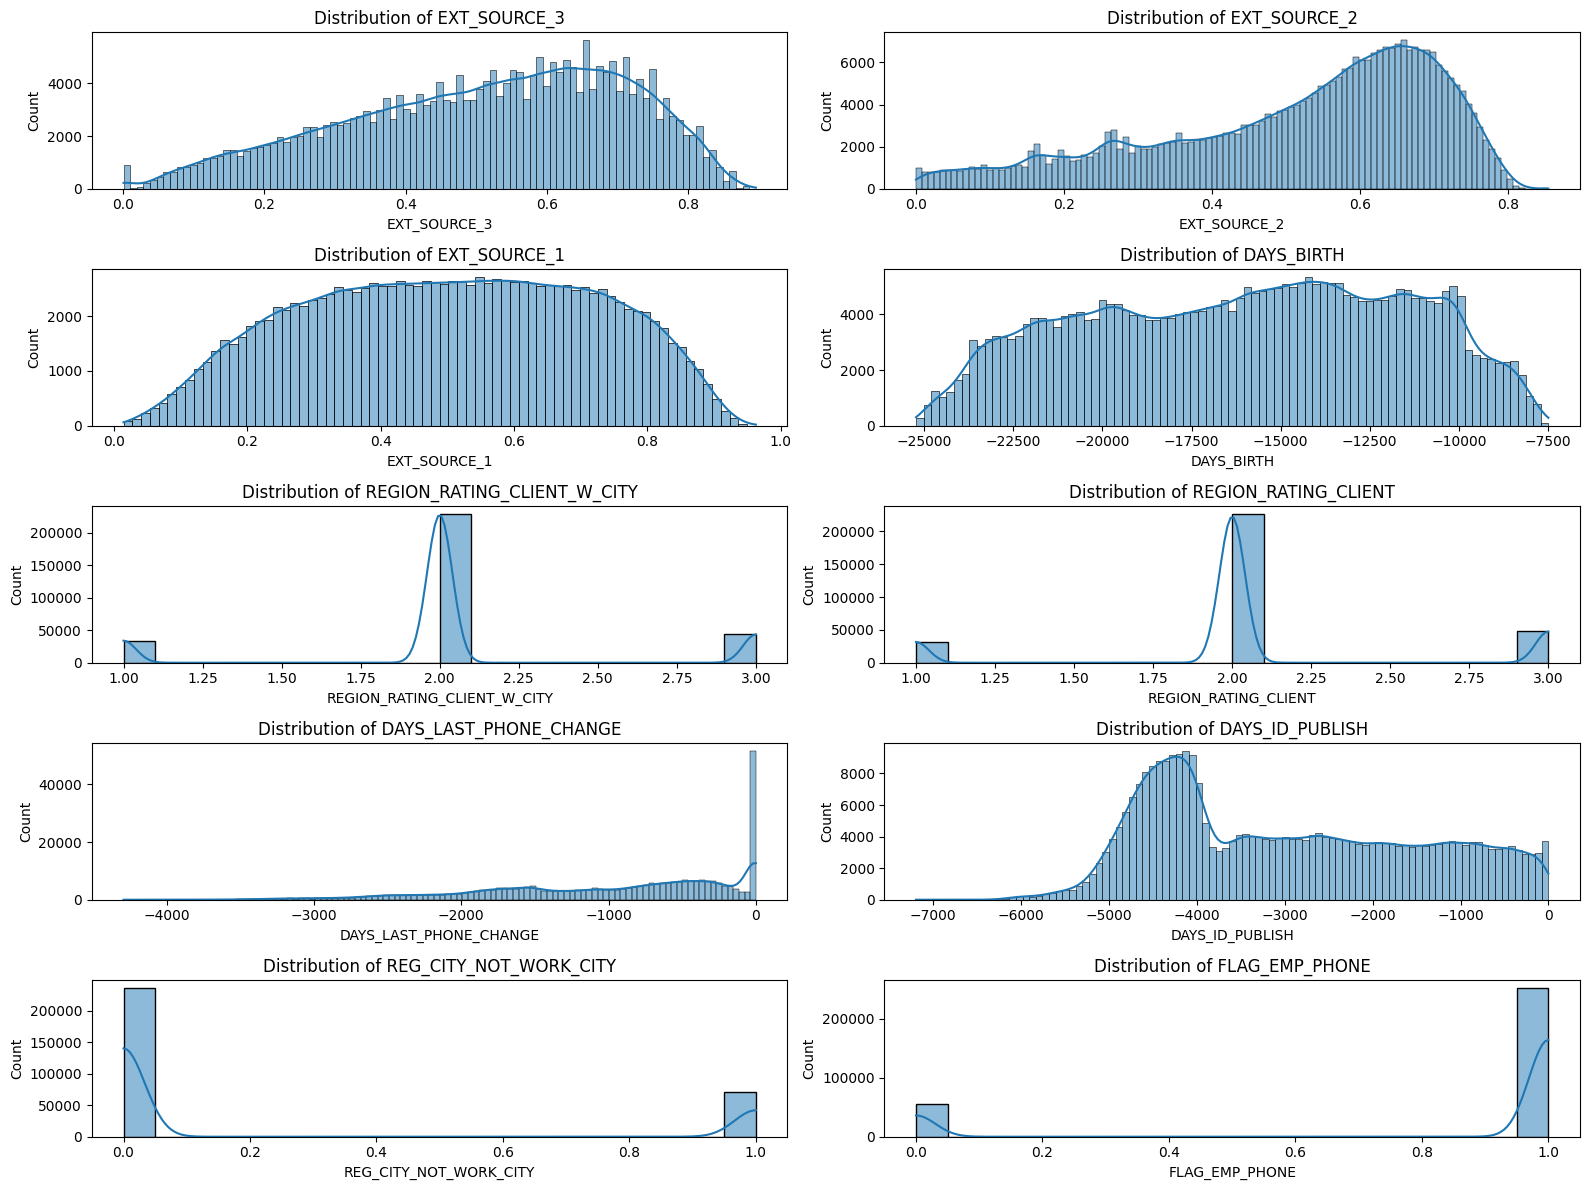

In [14]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(top_10_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(train_data[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


Boxplot of numerical features by target

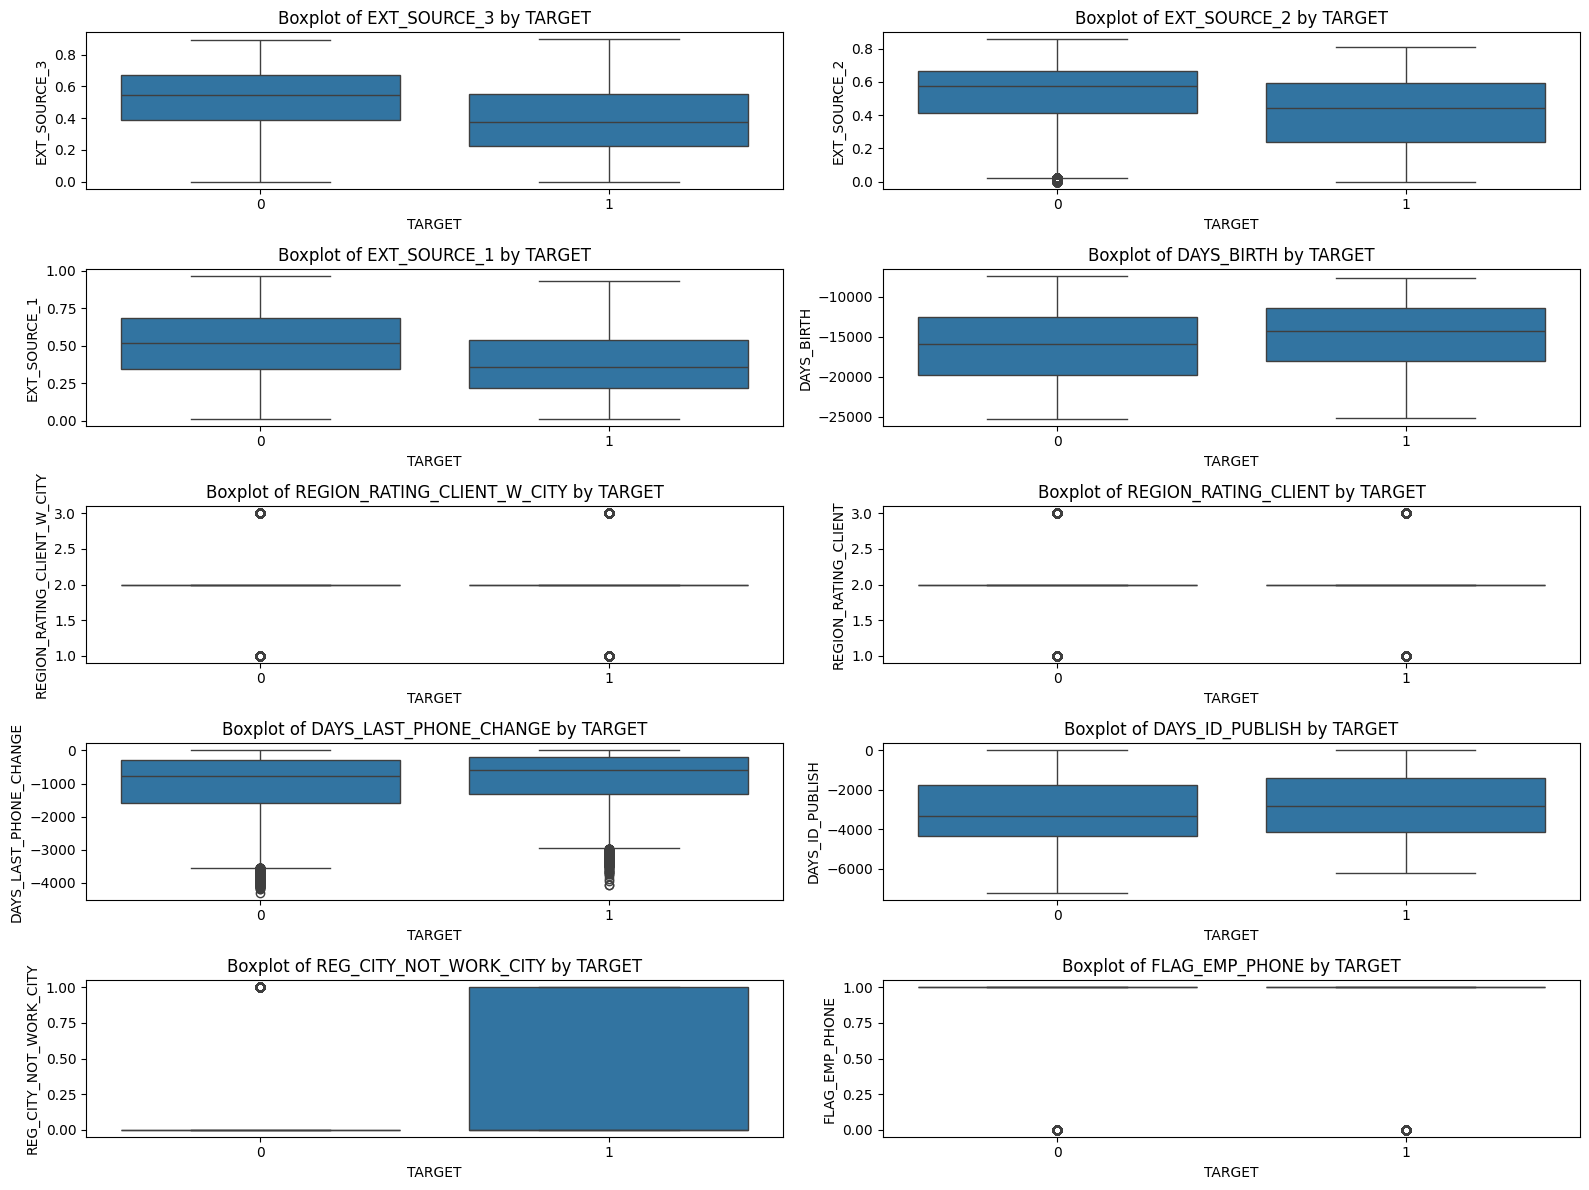

In [15]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(top_10_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='TARGET', y=feature, data=train_data)
    plt.title(f'Boxplot of {feature} by TARGET')
plt.tight_layout()
plt.show()


Pairplot of top 10 features

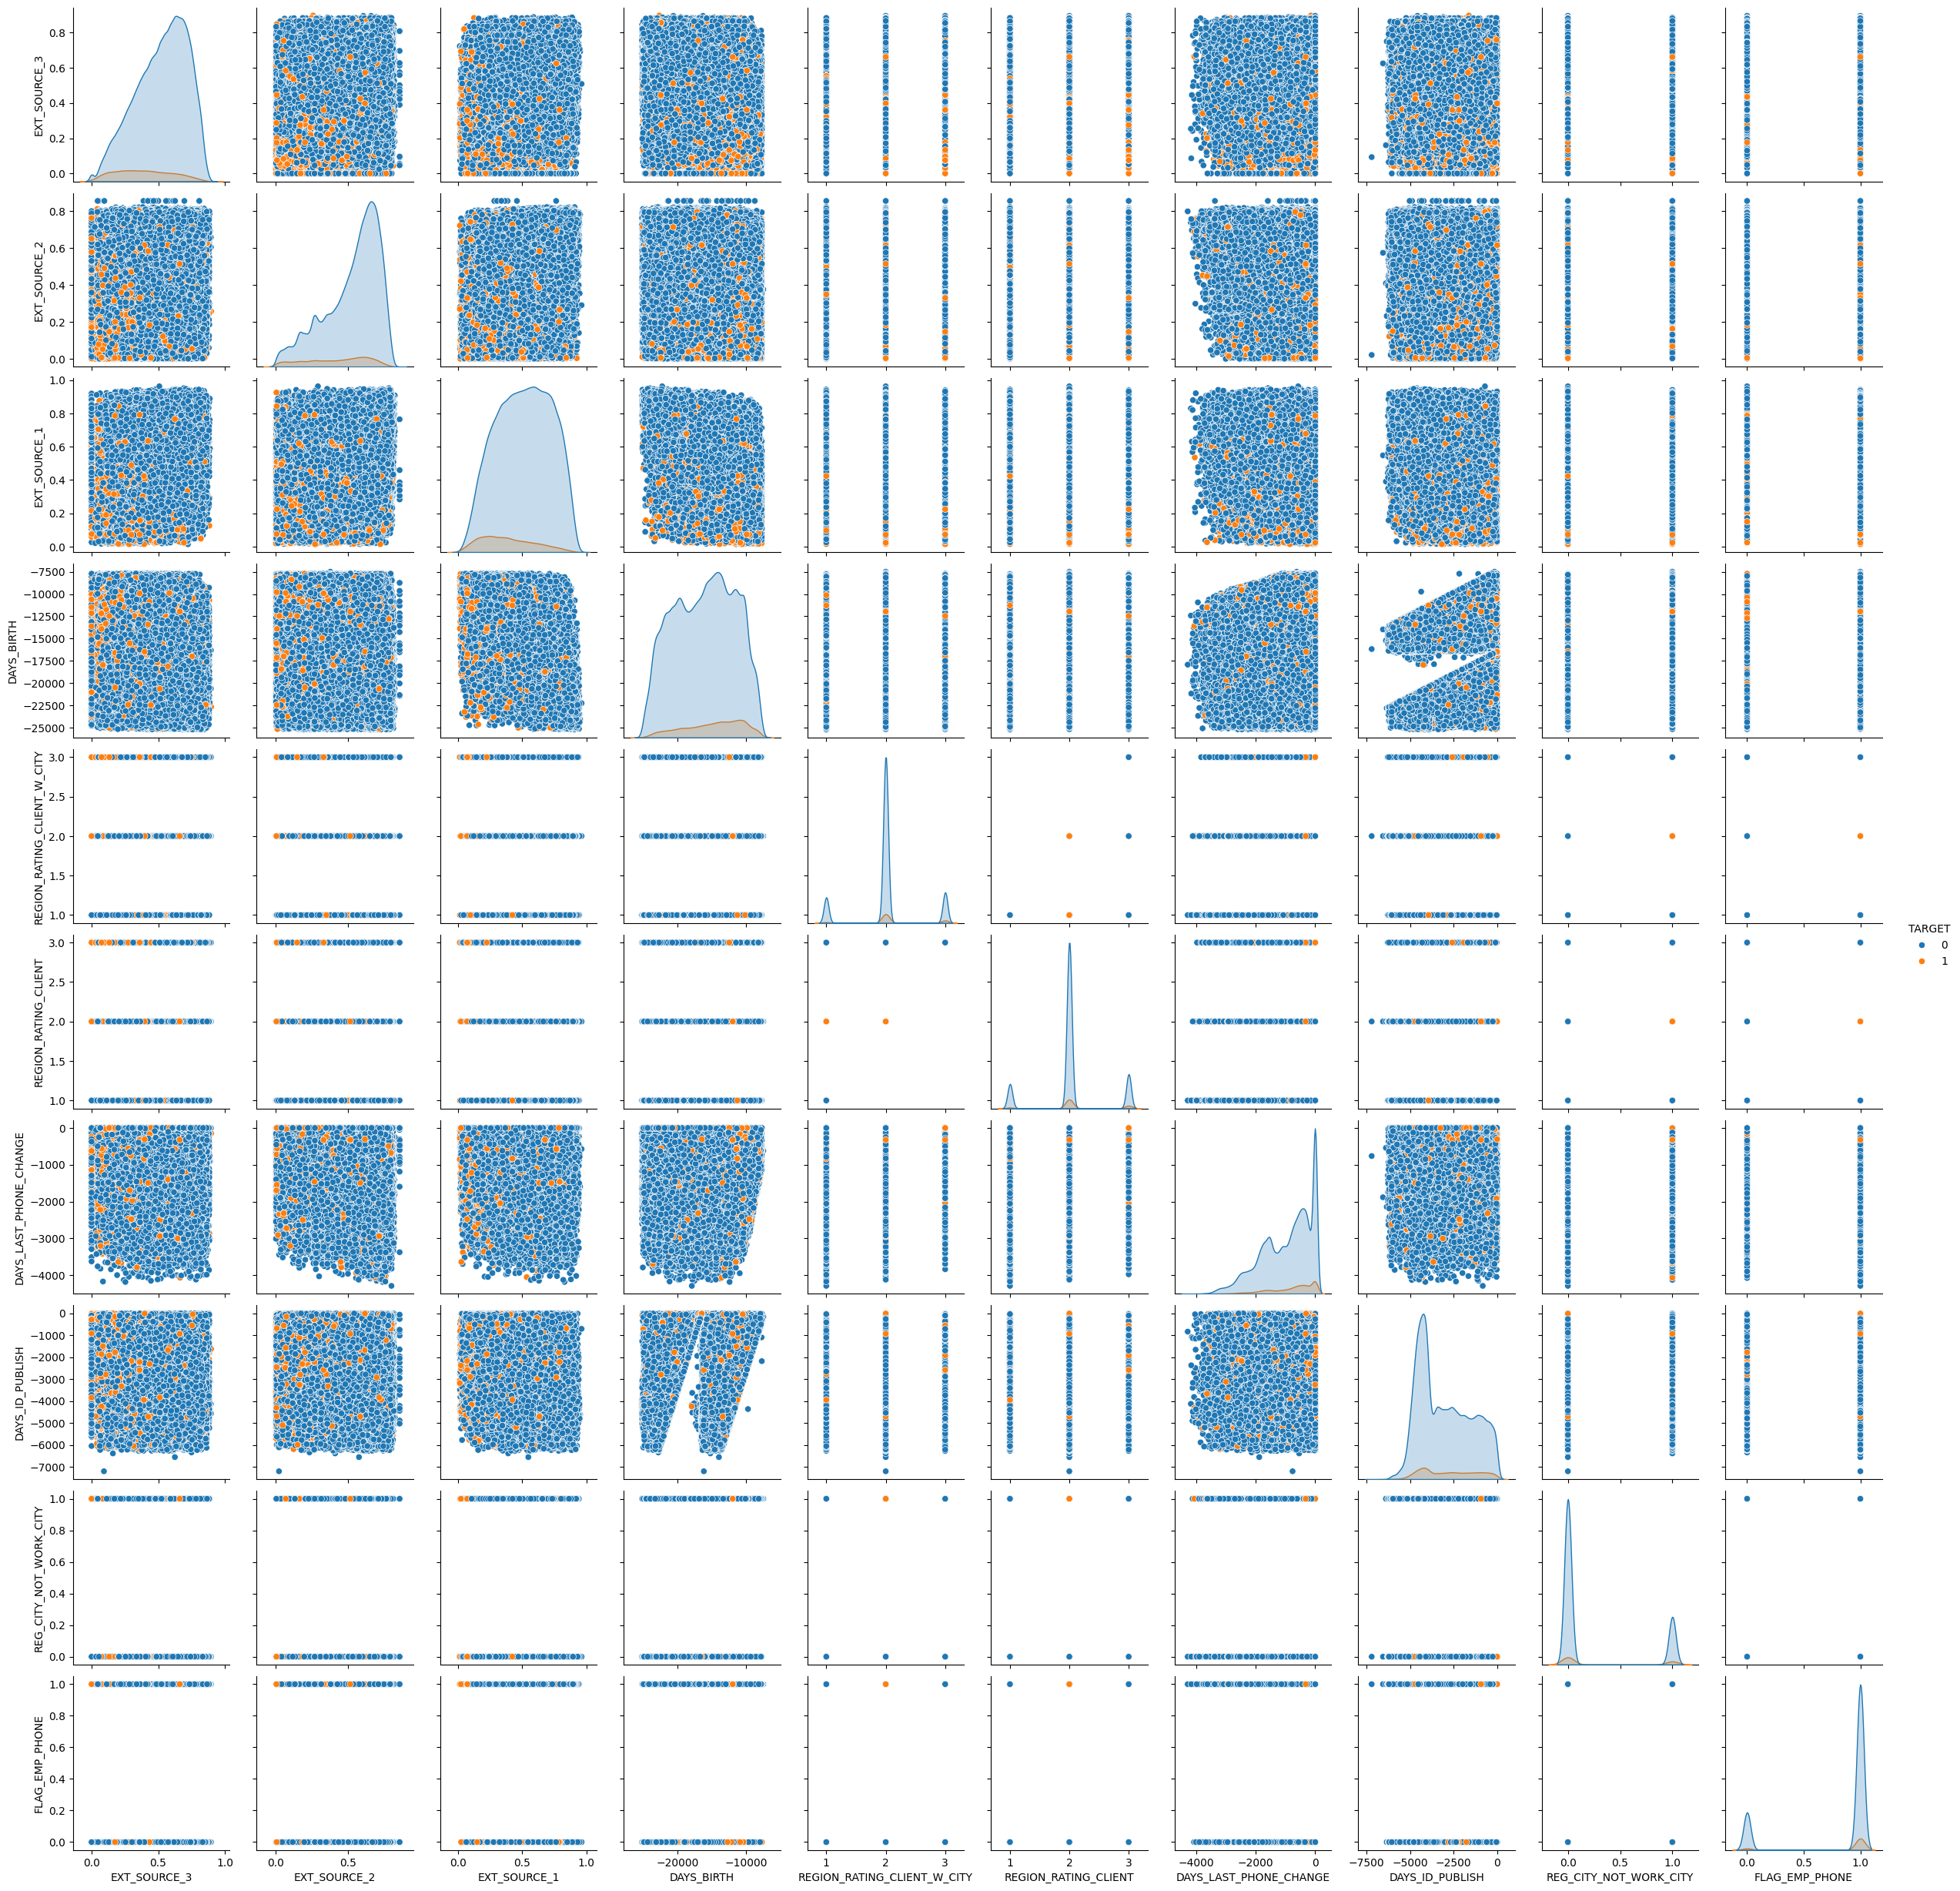

In [16]:
# Remove 'TARGET' from the list of top 10 features
top_10_features_without_target = [feature for feature in top_10_features if feature != 'TARGET']

# Plot pairplot of top 10 features
sns.pairplot(train_data[top_10_features_without_target + ['TARGET']], hue='TARGET', diag_kind='kde')
plt.show()


##### Baseline model using Logistic Regression

In [17]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = train_data[top_10_features]
y = train_data['TARGET']

In [18]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Define preprocessing for numerical columns (impute missing values and scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


In [20]:
# Initialize and train the model
baseline_model = Pipeline(steps=[
    ('preprocessor', numeric_transformer),
    ('classifier', LogisticRegression(max_iter=1000))])

In [21]:
baseline_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [22]:
# Predict and evaluate the model
y_train_pred = baseline_model.predict_proba(X_train)[:, 1]
y_val_pred = baseline_model.predict_proba(X_val)[:, 1]

In [23]:
# Calculate AUC
train_auc = roc_auc_score(y_train, y_train_pred)
val_auc = roc_auc_score(y_val, y_val_pred)

In [24]:
print(f'Baseline Model - Train AUC: {train_auc:.4f}')
print(f'Baseline Model - Validation AUC: {val_auc:.4f}')

Baseline Model - Train AUC: 0.7219
Baseline Model - Validation AUC: 0.7239


#### Feature Engineering
Feature Engineering with Logistic Regression

In [25]:
# Train a new logistic regression model with preprocessed data
feature_engineered_model = Pipeline(steps=[
    ('preprocessor', numeric_transformer),
    ('classifier', LogisticRegression(max_iter=1000))])

In [26]:
feature_engineered_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [27]:
# Predict and evaluate the model
y_train_pred = feature_engineered_model.predict_proba(X_train)[:, 1]
y_val_pred = feature_engineered_model.predict_proba(X_val)[:, 1]


In [28]:
# Calculate AUC
train_auc = roc_auc_score(y_train, y_train_pred)
val_auc = roc_auc_score(y_val, y_val_pred)

In [29]:
print(f'Feature Engineering Model - Train AUC: {train_auc:.4f}')
print(f'Feature Engineering Model - Validation AUC: {val_auc:.4f}')

Feature Engineering Model - Train AUC: 0.7219
Feature Engineering Model - Validation AUC: 0.7239


#### Estimation on Test Data and Submission
Load Test Data and Apply Preprocessing

In [30]:
# Apply preprocessing to test data
X_test = test_data[top_10_features]
X_test_processed = numeric_transformer.transform(X_test)

In [31]:
# Predict on test data
y_test_pred = feature_engineered_model.predict_proba(X_test_processed)[:, 1]


c:\Users\HP\Documents\machine-learning\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [32]:
# Prepare submission file
submission = pd.DataFrame({'SK_ID_CURR': test_data['SK_ID_CURR'], 'TARGET': y_test_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")


Submission file created: submission.csv


Add

In [33]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [34]:
# Custom transformer to create interaction features
class InteractionFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, interaction_pairs):
        self.interaction_pairs = interaction_pairs
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_interaction = pd.DataFrame(X, columns=X.columns)
        for (a, b) in self.interaction_pairs:
            if a in X_interaction.columns and b in X_interaction.columns:
                X_interaction[f'{a}_x_{b}'] = X_interaction[a] * X_interaction[b]
        return X_interaction



In [35]:
# Define numeric features
numeric_features = top_10_features


In [36]:
# Define preprocessing pipeline
preprocessing = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [37]:
def log_transform(X):
    return np.log1p(X.replace([np.inf, -np.inf], np.nan).fillna(0))

In [38]:
# Define different feature engineering strategies

strategies = {
    "Baseline": Pipeline(steps=[
        ('preprocessor', preprocessing),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    "Interaction Features": Pipeline(steps=[
        ('preprocessor', preprocessing),
        ('interactions', InteractionFeatures(interaction_pairs=[('EXT_SOURCE_1', 'EXT_SOURCE_2'), ('EXT_SOURCE_2', 'EXT_SOURCE_3')])),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    "Polynomial Features": Pipeline(steps=[
        ('preprocessor', preprocessing),
        ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    "Log Transform": Pipeline(steps=[
        ('preprocessor', preprocessing),
        ('log', FunctionTransformer(log_transform, validate=True)),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    "Bin Continuous Variables": Pipeline(steps=[
        ('preprocessor', preprocessing),
        ('binning', FunctionTransformer(lambda X: np.floor(X / 10) * 10, validate=True)),
        ('classifier', LogisticRegression(max_iter=1000))
    ])
}


In [39]:
# Evaluate each strategy
results = {}
for name, pipeline in strategies.items():
    try:
        pipeline.fit(X_train, y_train)
        y_train_pred = pipeline.predict_proba(X_train)[:, 1]
        y_val_pred = pipeline.predict_proba(X_val)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_pred)
        val_auc = roc_auc_score(y_val, y_val_pred)
        results[name] = {
            'train_auc': train_auc,
            'val_auc': val_auc
        }
    except Exception as e:
        print(f"Error with strategy {name}: {e}")



Error with strategy Interaction Features: 'numpy.ndarray' object has no attribute 'columns'
Error with strategy Log Transform: 'numpy.ndarray' object has no attribute 'replace'


In [40]:
# Print results
for name, result in results.items():
    print(f"{name} - Train AUC: {result['train_auc']:.4f}, Validation AUC: {result['val_auc']:.4f}")


Baseline - Train AUC: 0.7219, Validation AUC: 0.7239
Polynomial Features - Train AUC: 0.7243, Validation AUC: 0.7267
Bin Continuous Variables - Train AUC: 0.6798, Validation AUC: 0.6811


In [41]:
# Use the best strategy to predict on test data and prepare submission
best_strategy = max(results, key=lambda x: results[x]['val_auc'])
print(f"Best Strategy: {best_strategy}")


Best Strategy: Polynomial Features


In [42]:
best_pipeline = strategies[best_strategy]
test_data = pd.read_csv('application_test.csv')
X_test = test_data[top_10_features]

In [43]:
# Ensure the preprocessor handles missing values
X_test_processed = best_pipeline.named_steps['preprocessor'].transform(X_test)
X_test_processed = pd.DataFrame(X_test_processed, columns=X_test.columns)


In [44]:
# Ensure the preprocessor handles missing values
X_test_processed = best_pipeline.named_steps['preprocessor'].transform(X_test)
X_test_processed = pd.DataFrame(X_test_processed, columns=X_test.columns)


In [45]:
# Apply necessary transformations based on the best strategy
if 'interactions' in best_pipeline.named_steps:
    X_test_processed = best_pipeline.named_steps['interactions'].transform(X_test_processed)
elif 'log' in best_pipeline.named_steps:
    X_test_processed = best_pipeline.named_steps['log'].transform(X_test_processed)
elif 'poly' in best_pipeline.named_steps:
    X_test_processed = best_pipeline.named_steps['poly'].transform(X_test_processed)
elif 'binning' in best_pipeline.named_steps:
    X_test_processed = best_pipeline.named_steps['binning'].transform(X_test_processed)


c:\Users\HP\Documents\machine-learning\ml\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [46]:
y_test_pred = best_pipeline.named_steps['classifier'].predict_proba(X_test_processed)[:, 1]


In [47]:
submission = pd.DataFrame({'SK_ID_CURR': test_data['SK_ID_CURR'], 'TARGET': y_test_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv



Baseline - This strategy used the original top 10 features without any additional modifications. It serves as a reference point.
Interaction features - Created new features by interacting pairs of top features.
Polynomial features - Included polynomial terms to capture non-linear relationships.
Log transform - Applied log transformation to handle skewed distributions.
Bin continuous variables - Binned continuous variables into discrete intervals to reduce noise.
For each strategy, trained a logistic regression model and evaluated its performance using AUC. We then identified the best strategy based on the validation AUC score and used it to predict on the test data for submission.

In [1]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c home-credit-default-risk
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o home-credit-default-risk.zip

Traceback (most recent call last):
  File "c:\Users\HP\Documents\machine-learning\ml\Scripts\kaggle-script.py", line 33, in <module>
    sys.exit(load_entry_point('kaggle==1.6.14', 'console_scripts', 'kaggle')())
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\Documents\machine-learning\ml\Scripts\kaggle-script.py", line 25, in importlib_load_entry_point
    return next(matches).load()
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\importlib\metadata\__init__.py", line 202, in load
    module = import_module(match.group('module'))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1206, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1178, in _find_and_load
  File "<frozen